## Create folder for this run

In [1]:
from datetime import datetime
import os

# REPLACE WITH YOUR PWD OR PATH:
path_to_here = "/Users/galmoore/Google Drive/MY_WORK/1. My projects/4. Corona_Virus_Stock_Market/"
TOP_X = 30

In [2]:
date_time = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
full_path = path_to_here + date_time +'/'
full_path_top_x_cases = full_path+'top_x_log_cases/'
full_path_top_x_growth = full_path+'top_x_growth/'
full_path_early_days_compared = full_path+'early_days_compared/'
os.mkdir(full_path)
os.mkdir(full_path_top_x_cases)
os.mkdir(full_path_top_x_growth)
os.mkdir(full_path_early_days_compared)

In [3]:
print("SAVING FOLDER WITH ALL PLOTS HERE {}".format(full_path))

SAVING FOLDER WITH ALL PLOTS HERE /Users/galmoore/Google Drive/MY_WORK/1. My projects/4. Corona_Virus_Stock_Market/2020-12-26_12-25-27/


## imports

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import statistics
%matplotlib inline 

/Users/galmoore/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/Users/galmoore/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


In [5]:
# what = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/who_covid_19_situation_reports/who_covid_19_sit_rep_time_series/who_covid_19_sit_rep_time_series.csv")
# what

## setup data frames and dates

In [6]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
# recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

confirmed_df.set_index(["Country/Region","Province/State"], inplace=True)
deaths_df.set_index(["Country/Region","Province/State"], inplace=True)
# recoveries_df.set_index(["Country/Region","Province/State"], inplace=True)
confirmed_df.drop(['Long','Lat'],axis=1,inplace=True)
deaths_df.drop(['Long','Lat'],axis=1,inplace=True)
# recoveries_df.drop(['Long','Lat'],axis=1,inplace=True)

In [7]:
def get_list_of_dates(start):
    dates = confirmed_df.keys()
    future_forcast = np.array([i for i in range(len(dates))]).reshape(-1, 1)
    start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
    future_forcast_dates = []
    for i in range(len(future_forcast)):
        future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
    adjusted_dates = future_forcast_dates
    return adjusted_dates

adjusted_dates = get_list_of_dates(start = '1/22/2020')

## global figures

### code

In [10]:
def get_total_case_recover_death_and_sick(confirmed_df,deaths_df):
    list_daily_cases = []
    list_daily_deaths = []
    for i in range(len(confirmed_df.columns)):
        confirmed_total_per_day = confirmed_df[confirmed_df.columns[i]].sum()
        death_total_per_day = deaths_df[deaths_df.columns[i]].sum()
        list_daily_cases.append(confirmed_total_per_day)
        list_daily_deaths.append(death_total_per_day)
    list_daily_cases = np.array(list_daily_cases)
    list_daily_deaths = np.array(list_daily_deaths)
#     plt.yticks(np.arange(0, 150000, 1)) 
    plt.figure(figsize=(15, 7))
    plt.plot(adjusted_dates,list_daily_cases)
    plt.plot(list_daily_deaths)
    plt.xticks(rotation=50, size=8)
    plt.legend(["cases","deaths"])
    plt.title("global total (accumulative)", size=20)
    plt.grid()
    plt.savefig(full_path+"global total (accumulative)")
    plt.show()

### visualisation

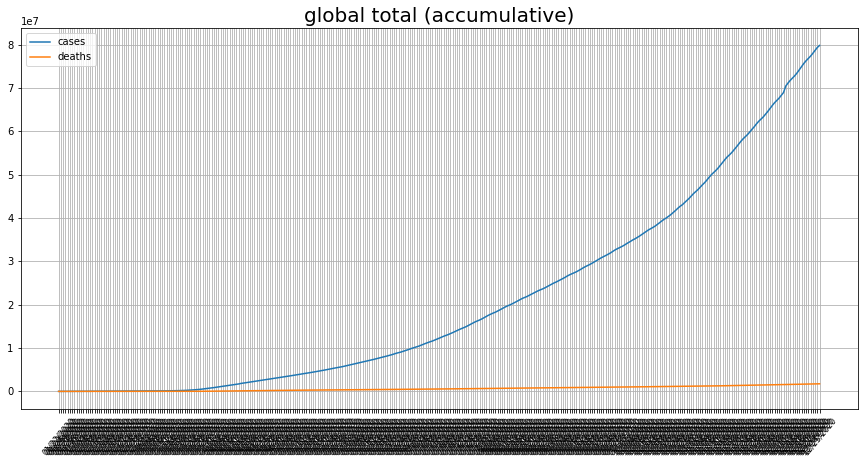

In [11]:
get_total_case_recover_death_and_sick(confirmed_df,deaths_df)

### code

In [12]:
def get_daily_new_cases_plot(confirmed_df,deaths_df):
    list_daily_cases = []
    list_daily_deaths = []
#     list_daily_recoveries = []
    for i in range(len(confirmed_df.columns)):
        confirmed_total_per_day = confirmed_df[confirmed_df.columns[i]].sum()
        death_total_per_day = deaths_df[deaths_df.columns[i]].sum()
#         recovered_total_per_day = recoveries_df[recoveries_df.columns[i]].sum()
        list_daily_cases.append(confirmed_total_per_day)
        list_daily_deaths.append(death_total_per_day)
#         list_daily_recoveries.append(recovered_total_per_day)
    list_daily_cases = np.array(list_daily_cases)
    list_daily_deaths = np.array(list_daily_deaths)
#     list_daily_recoveries = np.array(list_daily_recoveries)
#     list_alive_and_sick_on_this_day = list_daily_cases-list_daily_deaths-list_daily_recoveries
    daily_cases_non_acc = []
    daily_deaths_non_acc = []
#     daily_recoveries_non_acc = []
    for i in range(len(list_daily_cases)):
        if i ==0:
            daily_cases_non_acc.append(list_daily_cases[i]/2)
            continue
        else:
            daily_cases_non_acc.append(list_daily_cases[i]-list_daily_cases[i-1])    
    for i in range(len(list_daily_deaths)):
        if i ==0:
            daily_deaths_non_acc.append(list_daily_deaths[i]/2)
            continue
        else:
            daily_deaths_non_acc.append(list_daily_deaths[i]-list_daily_deaths[i-1])    
#     for i in range(len(list_daily_recoveries)):
#         if i ==0:
#             daily_recoveries_non_acc.append(list_daily_recoveries[i]/2)
#             continue
#         else:
#             daily_recoveries_non_acc.append(list_daily_recoveries[i]-list_daily_recoveries[i-1])
    plt.figure(figsize=(15, 7))
    plt.plot(adjusted_dates,daily_cases_non_acc)
    plt.plot(adjusted_dates,daily_deaths_non_acc)
#     plt.plot(adjusted_dates,daily_recoveries_non_acc)
    plt.title("global daily figures",size=20)
    plt.legend(["cases","deaths","recoveries"])
    plt.xticks(rotation=50, size=8)
    plt.grid()
    plt.savefig(full_path+"global daily figures")
    plt.show()

### visualisation

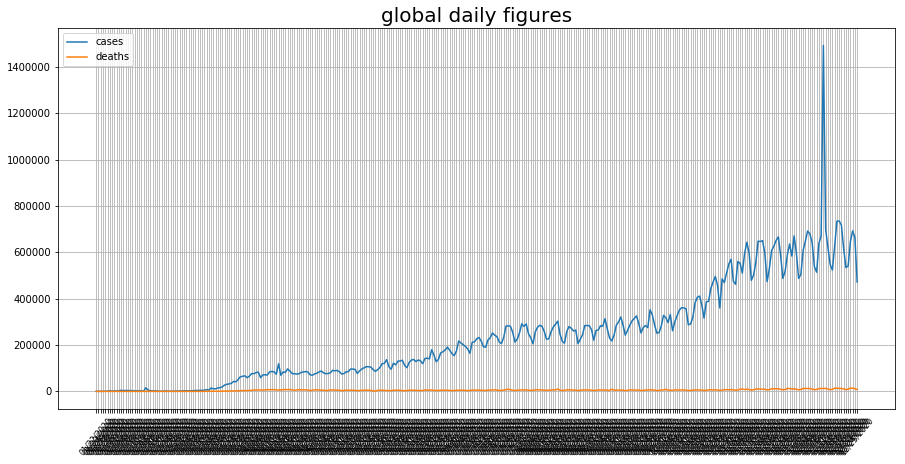

In [13]:
get_daily_new_cases_plot(confirmed_df,deaths_df)

## get top X countries by num cases & plot 

### code

In [14]:
sorted_by_case_df = confirmed_df.sort_values(by=confirmed_df.columns[-1],ascending=False)
sbcdf_df = sorted_by_case_df[:TOP_X]
sbcdf_df
# df = df.drop(df[df.score < 50].index)
sorted_by_case_df_no_China = sorted_by_case_df.drop('China')
sbcdf_df_no_china = sorted_by_case_df_no_China[:TOP_X]
# sbcdf_df_no_china

/Users/galmoore/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


In [15]:
top_x_indices = sbcdf_df.index
top_x_indices = top_x_indices.to_list()

In [16]:
def plot_country(country_name_from_index, log=False):
    c = confirmed_df.loc[country_name_from_index,:]
    d = deaths_df.loc[country_name_from_index,:]
#     r = recoveries_df.loc[country_name_from_index,:]
    plt.figure(figsize=(16, 2))
    plt.plot(adjusted_dates,c)
    plt.plot(adjusted_dates,d)
#     plt.plot(adjusted_dates,r)
    plt.legend(["Cases","Deaths"])
    # plt.xlabel('Time in Days', size=30)
    # plt.ylabel('# of Cases', size=30)
    plt.axhline(y=0.5, color='k', linestyle='-')
    plt.xticks(rotation=50, size=8)
    plt.grid()
    if log==True:
        plt.yscale('log')
        plt.axis([0, len(c), 0, 1000000])
        plt.title("{} stats - log scale".format(country_name_from_index), size=20)
        plt.savefig(full_path_top_x_cases+"{} stats - log scale".format(country_name_from_index))

    else:
#         plt.axis([0, len(c), 0, lim_y])
        plt.title("{}".format(country_name_from_index), size=20)
    plt.show()

## If country had the daily growth rate of Hubei after it entered quarantine
1. Get date of quarantine from select countries:  
  Italy: 9/3/20  
  China: 23/1/20  
  Spain: 14/3/20   
  Germany: 14/3/20
2. take country as is till day it entered quarantine
3. calculate daily growth rate in Hubei from day of quarantine
4. Multiply daily growth rate with last number before quarantine in this country

### code

In [19]:
# 2. take country as is till day it entered quarantine
def get_list_tuples_zero_cases_till_quarantine(country_name_from_index, lockdown_date):
    c = confirmed_df.loc[country_name_from_index,:]
#     d = deaths_df.loc[country_name_from_index]
#     r = recoveries_df.loc[country_name_from_index,:]
    c.reset_index(drop=True, inplace=True)
    c = c.iloc[0].to_list()
    c = list(zip(c,adjusted_dates))
#     c = [i for i in c if i[0] != 0] # remove leading zeros
    c = [i for i in c if i[1] < lockdown_date] # remove trailing dates after lockdown
    return c
    
tuple_spain = get_list_tuples_zero_cases_till_quarantine("Spain",'03/14/2020')
tuple_italy = get_list_tuples_zero_cases_till_quarantine("Italy",'03/09/2020')
tuple_germany = get_list_tuples_zero_cases_till_quarantine("Germany",'03/14/2020')
tuples = [tuple_spain,tuple_italy,tuple_germany]


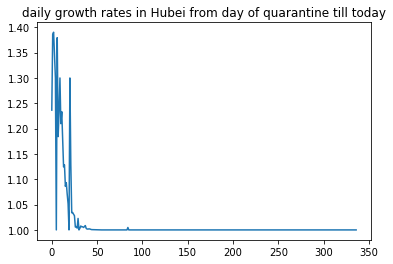

In [20]:
# 3. calculate daily growth rate in Hubei from day of quarantine
def daily_growth_hubei_from_quarantine():
    c = confirmed_df.loc['China','Hubei']
    c = c.to_list()
    c = list(zip(c,adjusted_dates))
    c = [i for i in c if i[1] > '01/22/2020'] # remove trailing dates after lockdown
    daily_growth_rate = []
    for i in range(len(c)-1):
        daily_growth = c[i+1][0]/c[i][0]
        daily_growth_rate.append(daily_growth)
    return daily_growth_rate

daily_growth_rates_hubei_list = daily_growth_hubei_from_quarantine()
# print("China daily growth daily as reported: {}".format(daily_growth_rates_hubei_list))
def trying_to_smooth_out_massive_jumps(day_grow_list):
    for n, i in enumerate(day_grow_list):
        if i == 2.4975404075895993:
            day_grow_list[n] = 1.3
        if i == 1.4447641311514716:
            day_grow_list[n] = 1.3
        if i == 1.5625611631483294:
            day_grow_list[n] = 1.3
    return day_grow_list
        
daily_growth_rates_hubei_list = trying_to_smooth_out_massive_jumps(daily_growth_rates_hubei_list)
# print("\n")
# print(daily_growth_rates_hubei_list)
plt.plot(daily_growth_rates_hubei_list)
plt.title("daily growth rates in Hubei from day of quarantine till today")
plt.show()

In [21]:
def multiply_last_day_without_q_and_forecast(tuple_list,growth_rates):
    num_on_last_day_before_q = tuple_list[-1][0]
    num_cases_after_quarantine = []
    yesterday = num_on_last_day_before_q
    for daily_growth_rate in growth_rates:
#         print()
        todays_num_cases = yesterday * daily_growth_rate
        num_cases_after_quarantine.append(todays_num_cases)
        yesterday = todays_num_cases
    list_cases_before_q = [x[0] for x in tuple_list]
    # list2= [x[1] for x in tuple_spain]
    return list_cases_before_q + num_cases_after_quarantine
    
before_q_and_after_q_spain = multiply_last_day_without_q_and_forecast(tuple_spain, daily_growth_rates_hubei_list )
before_q_and_after_q_italy = multiply_last_day_without_q_and_forecast(tuple_italy, daily_growth_rates_hubei_list)
before_q_and_after_q_germany = multiply_last_day_without_q_and_forecast(tuple_germany, daily_growth_rates_hubei_list) 
# before_q_and_after_q_france = 

In [22]:
def plot_before_and_after_q(b4_q_and_after_1, b4_q_and_after_2,b4_q_and_after_3, country_name1, country_name2,country_name3):
    plt.figure(figsize=(15, 7))
    plt.plot(b4_q_and_after_1)
    plt.plot(b4_q_and_after_2)
    plt.plot(b4_q_and_after_3)
    c = confirmed_df.loc['China','Hubei']
    c = c.to_list()
#     print("China", c)
#     print("spain",b4_q_and_after_1)

    plt.plot(c)
#     plt.plot(adjusted_dates,daily_cases_non_acc)
#     plt.plot(adjusted_dates,daily_deaths_non_acc)
#     plt.plot(adjusted_dates,daily_recoveries_non_acc)
    plt.title("forecast cases in {}, {} and {} assuming Hubei perfect quarantin growth rate".format(country_name1,country_name2,country_name3),size=20)
    plt.legend(["cases in {}".format(country_name1),"cases in {}".format(country_name2),"cases in {}".format(country_name3),"cases in {}".format("Hubei, China")])
    plt.xticks(rotation=0, size=14)
    plt.grid()
    plt.axis([0, len(c)+50, 0, 600000])

    plt.savefig(full_path+"global daily figures")
    plt.show()



### visualisation

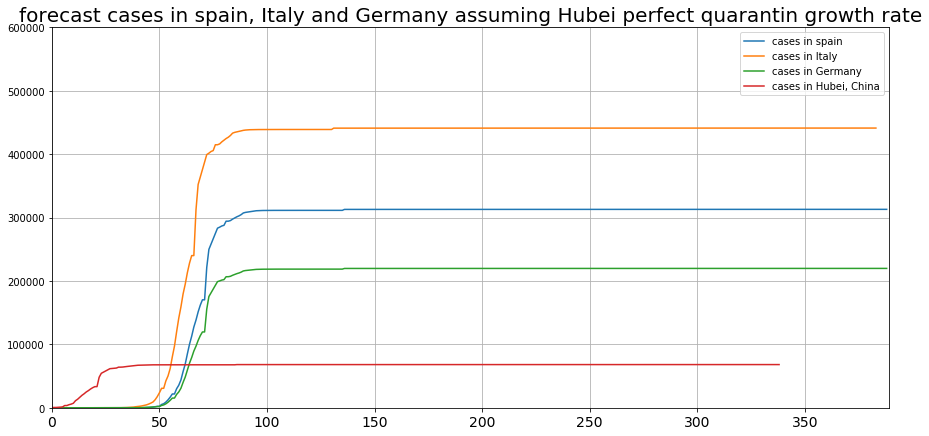

In [23]:
plot_before_and_after_q(before_q_and_after_q_spain, before_q_and_after_q_italy,before_q_and_after_q_germany,"spain","Italy","Germany")

In [24]:
print("TODAY IS DAY: {}".format(len(confirmed_df.columns)))


TODAY IS DAY: 339


## Just number of cases for top X

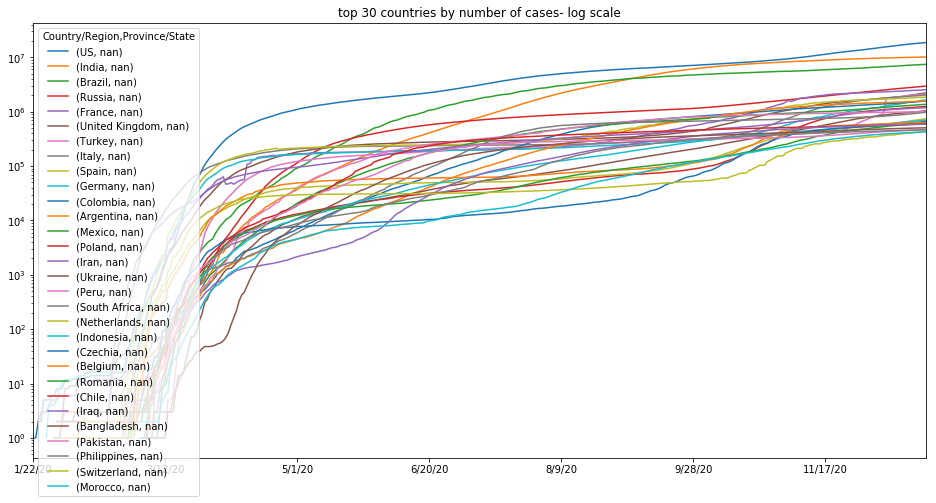

In [27]:
# sbcdf_df.transpose().plot(figsize=(16,8),logy=True,title="top X countries by number of cases- log scale")
fig = sbcdf_df.transpose().plot(figsize=(16, 8),logy=True,title="top {} countries by number of cases- log scale".format(TOP_X)).get_figure()
fig.savefig(full_path+'num cases for top {} - log'.format(TOP_X))

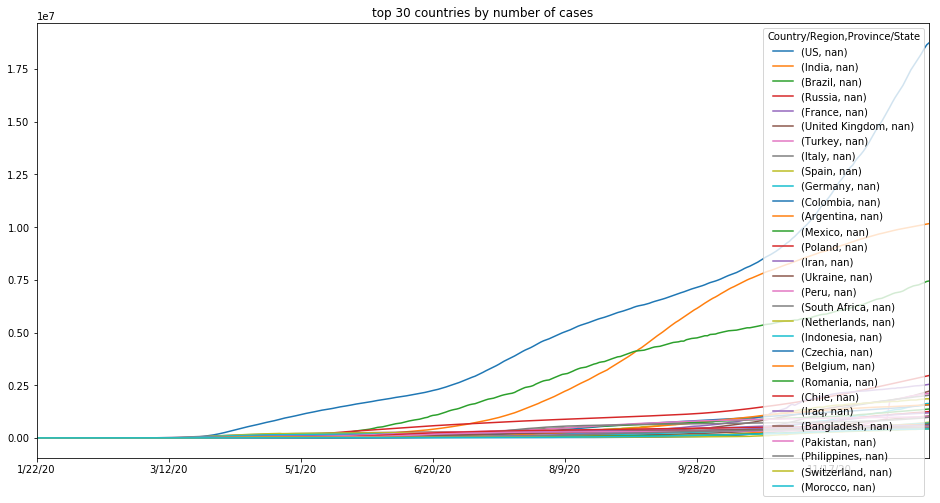

In [28]:
fig1 = sbcdf_df.transpose().plot(figsize=(16,8),logy=False,title="top {} countries by number of cases".format(TOP_X))
fig1.figure.savefig(full_path+'num cases for top {}'.format(TOP_X))

## per day growth rate for top X countries by number of cases

### code

In [29]:
def give_me_list_get_plot_of_growth_rates(country_name, df):
    
    series = df.loc[country_name,:].squeeze()
    my_dates = df.keys().tolist()
#     print("length of series {}".format(len(series)))
    cases = series.tolist()
    daily_growth_rates = []
    for i in range(len(cases)):
        if i==0:
            daily_growth_rates.append(0)
        elif cases[i]==0:
            daily_growth_rates.append(0)
        elif cases[i-1]==0:
            daily_growth_rates.append(0)
        else:
            daily_growth_rates.append(round(cases[i]/cases[i-1],3))
    plt.figure(figsize=(16, 2))
    plt.plot(daily_growth_rates)
    plt.legend(["Daily growth rate: {}".format(country_name)], fontsize=14)
    plt.xlabel('Days', size=10)
    plt.ylabel('growth rate', size=10)
    plt.axis([0, len(daily_growth_rates), 0.95,1.20])
    plt.xticks(rotation=50, size=8)
    plt.axhline(y=1.15, color='r', linestyle='--')
    plt.axhline(y=1, color='g', linestyle='--')
    plt.grid()
#     print("at inflectin point you will reach max cases in 2x time")
#     plt.figtext(0.5, .4, "red line = 1.15x hospitals could struggle", wrap=True, horizontalalignment='left', fontsize=10)
#     plt.figtext(0.5, .2, "green line = 1x inflection point", wrap=True, horizontalalignment='left', fontsize=10)
    plt.savefig(full_path_top_x_growth+"Daily growth rate: {}".format(country_name))
    plt.show()
    tuples = list(zip(my_dates,series,daily_growth_rates))

### visualisation

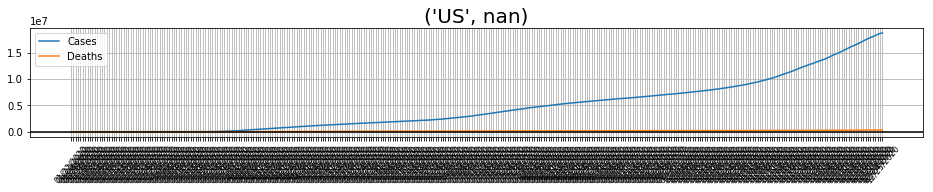

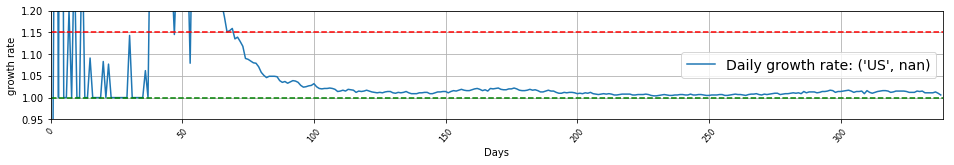

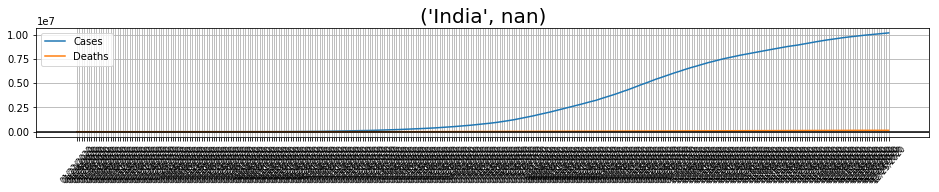

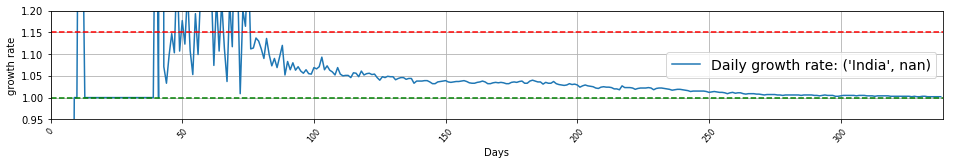

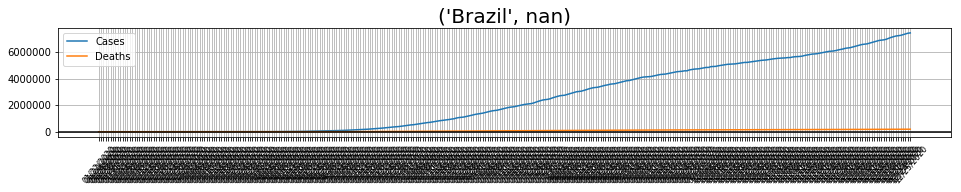

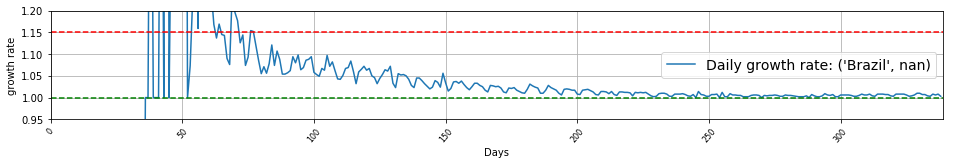

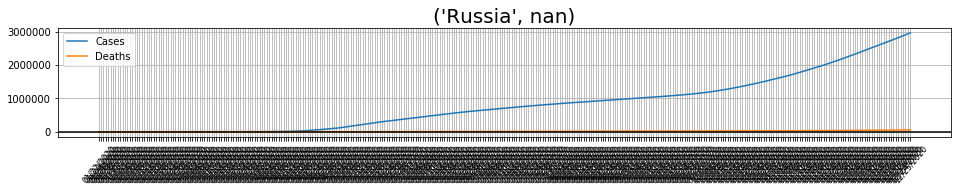

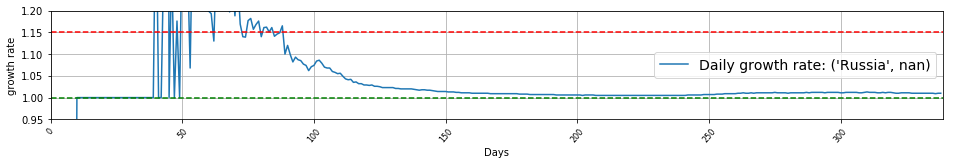

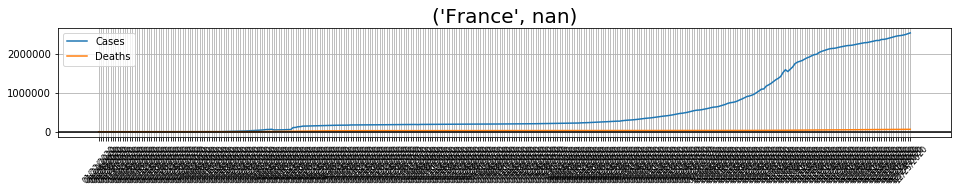

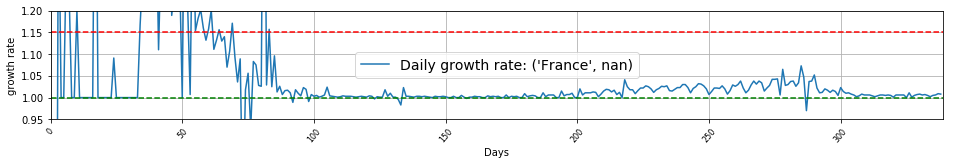

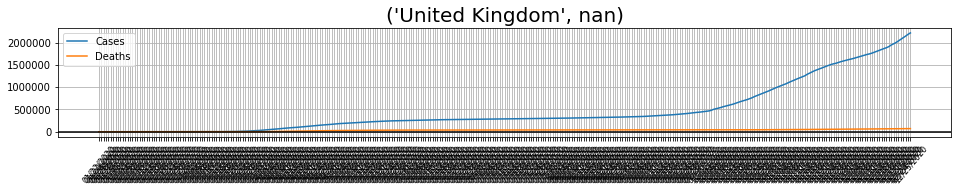

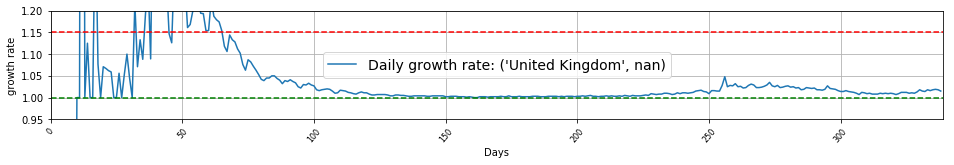

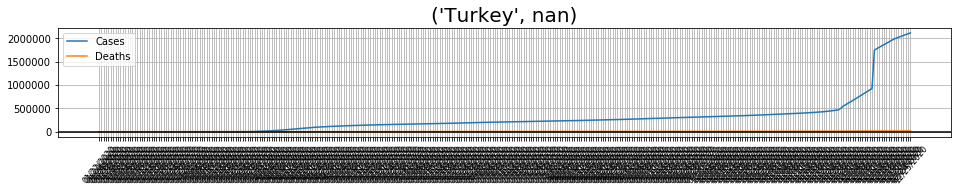

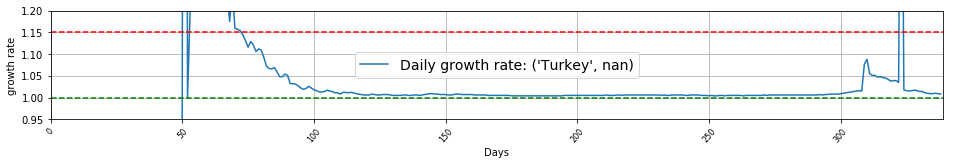

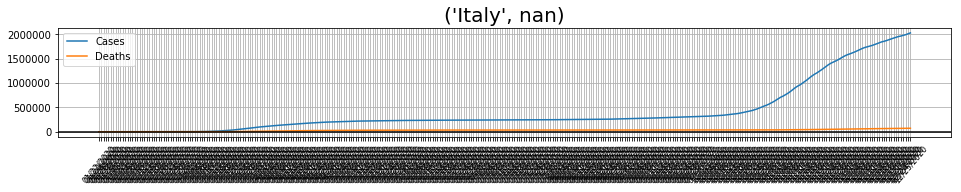

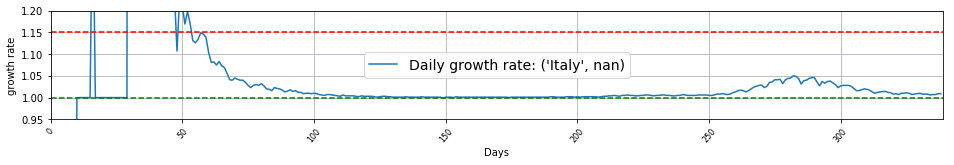

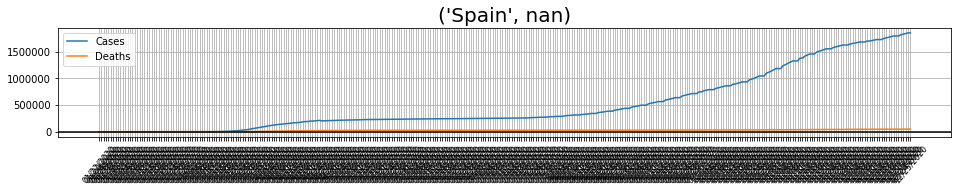

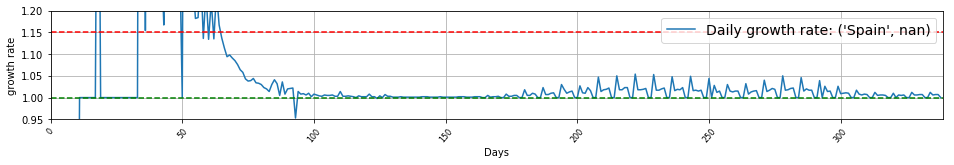

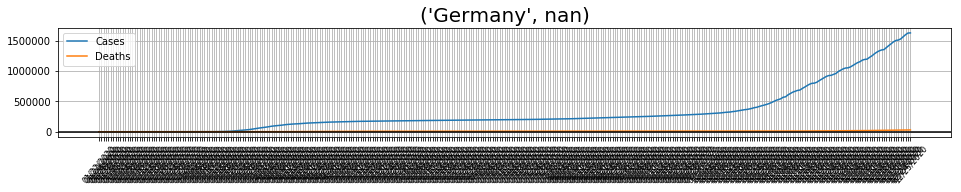

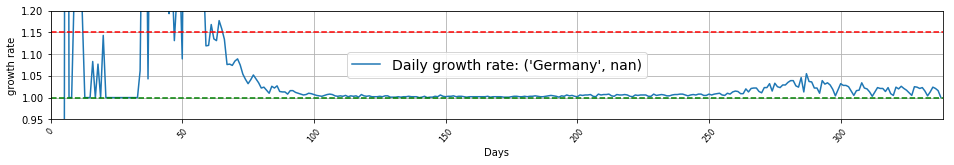

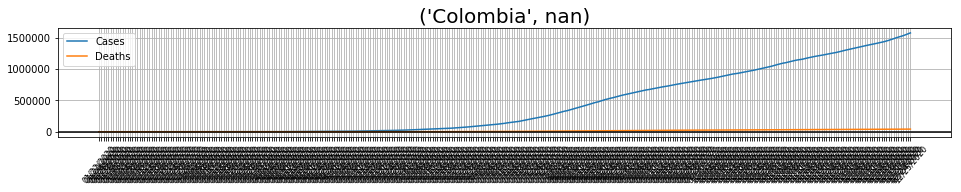

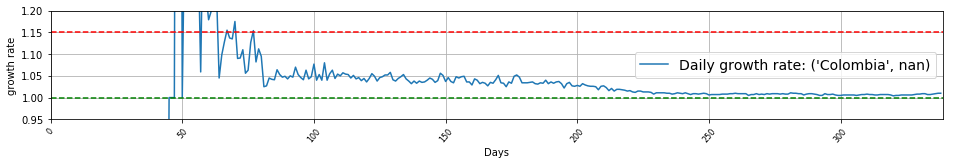

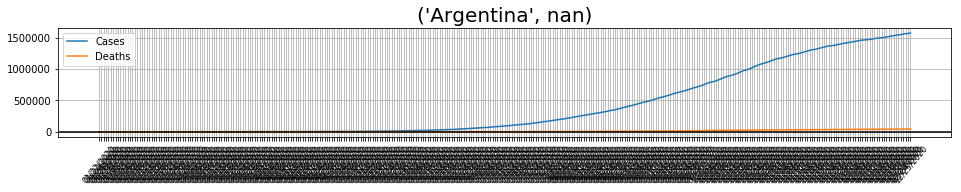

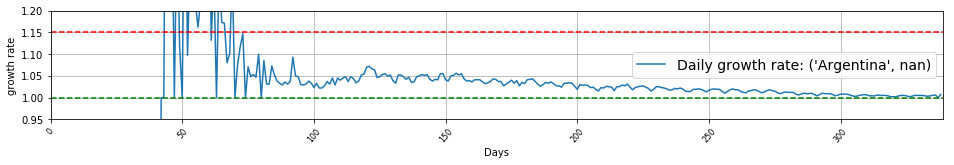

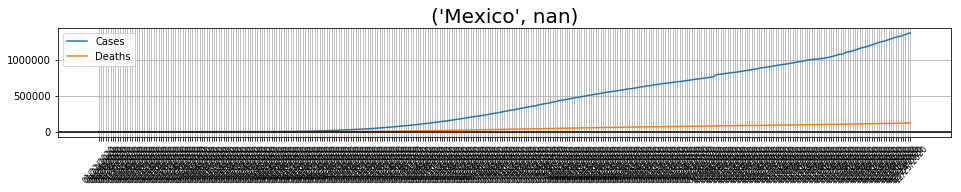

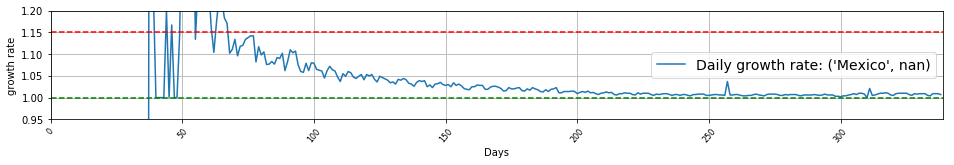

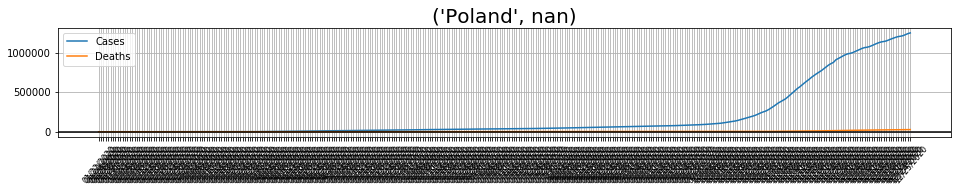

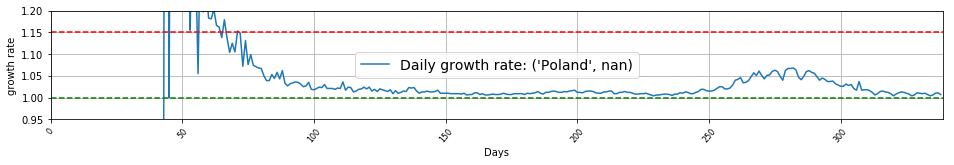

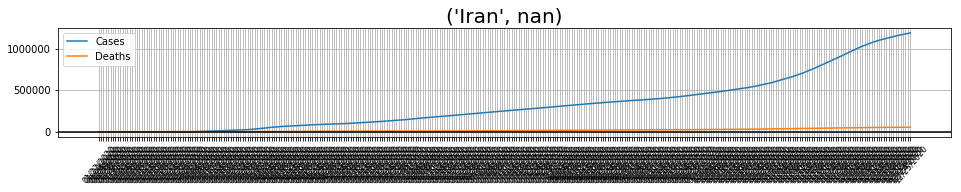

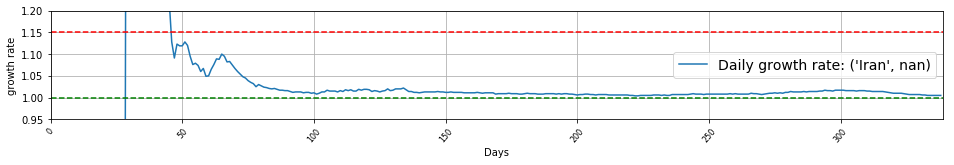

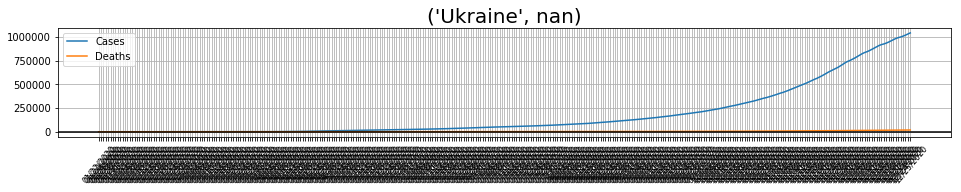

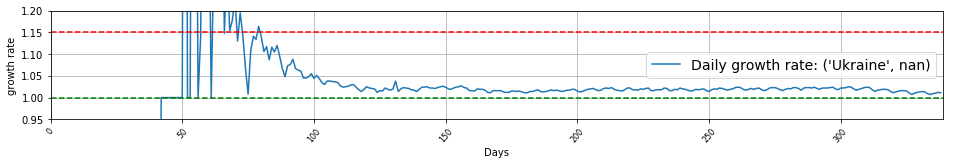

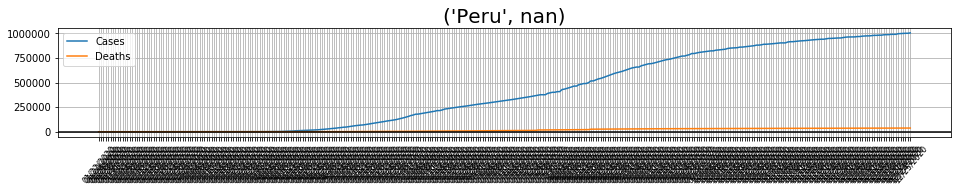

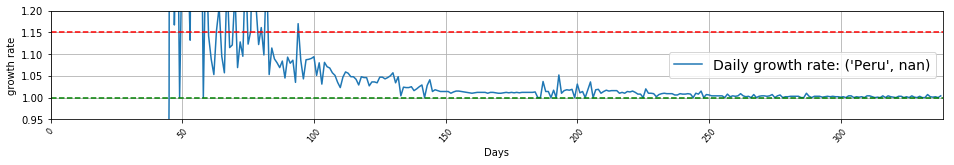

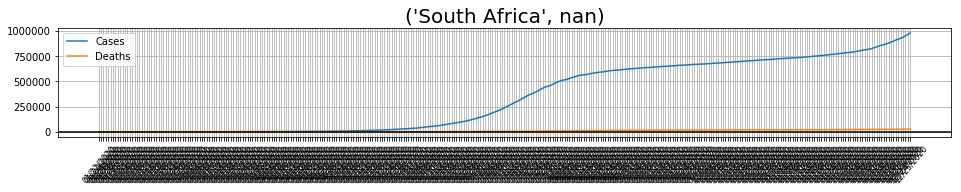

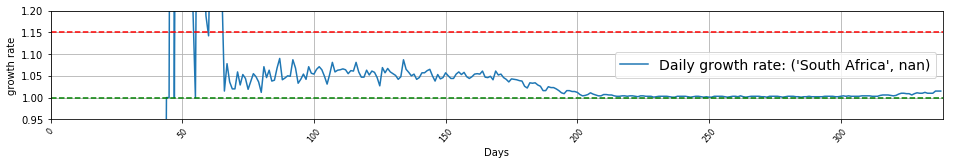

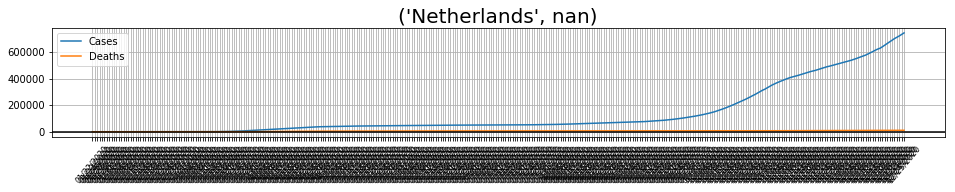

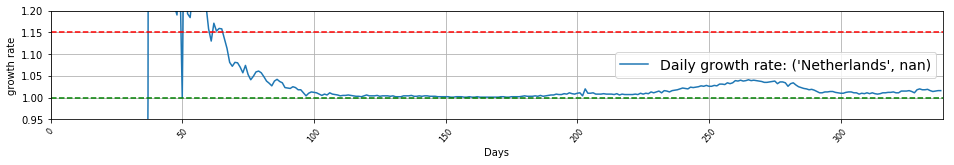

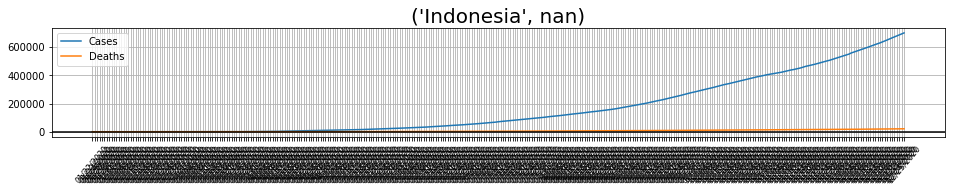

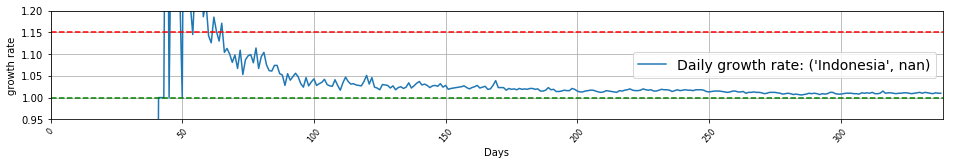

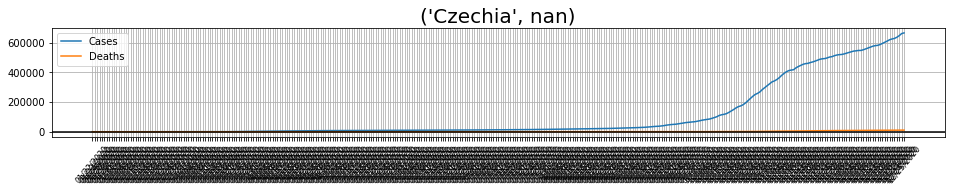

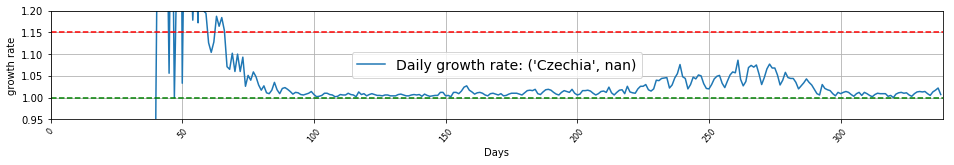

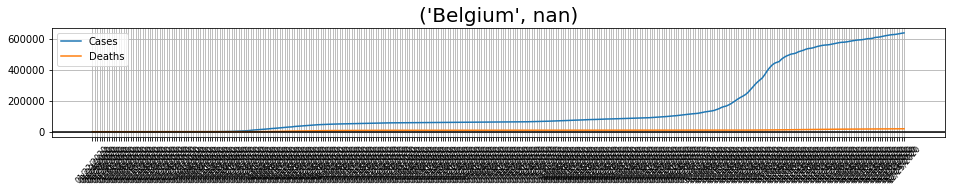

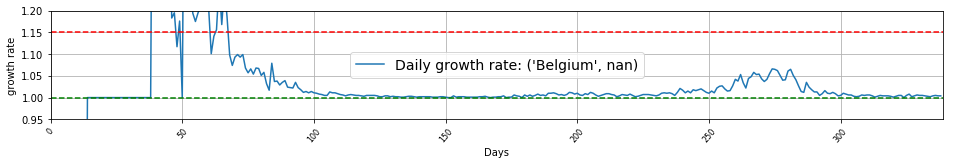

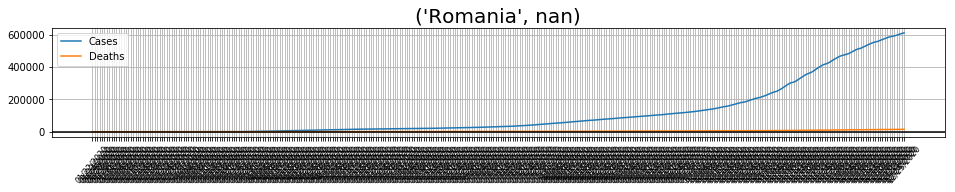

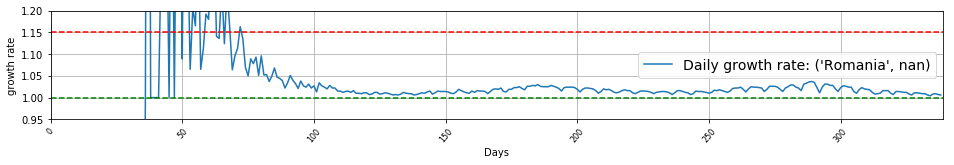

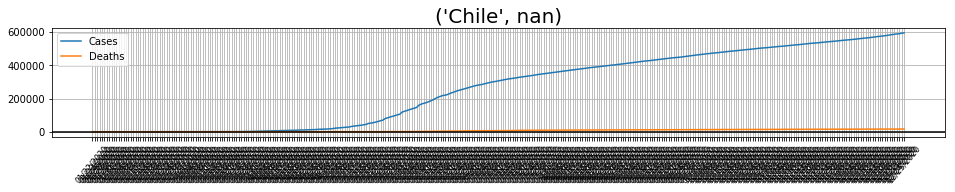

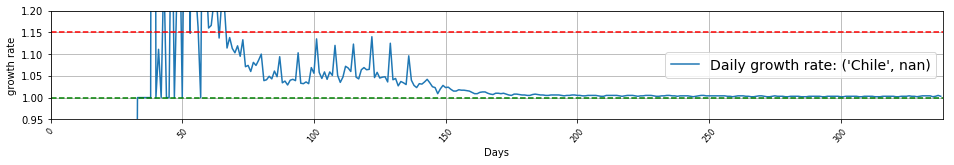

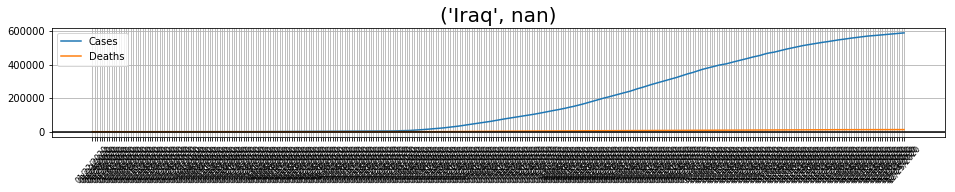

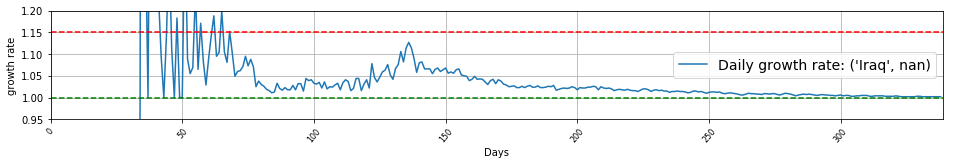

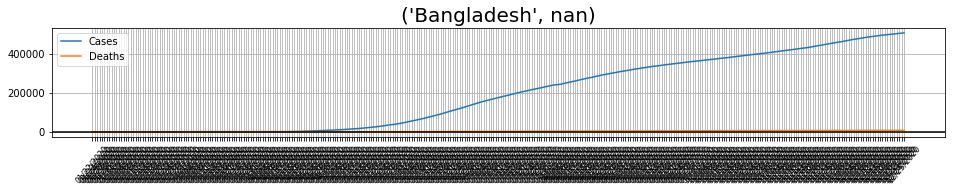

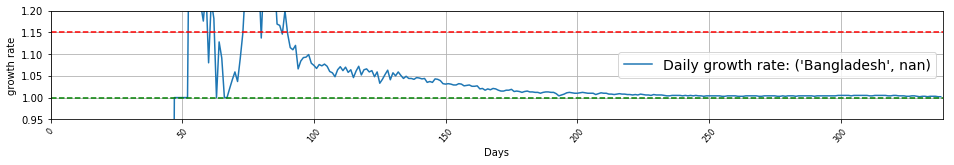

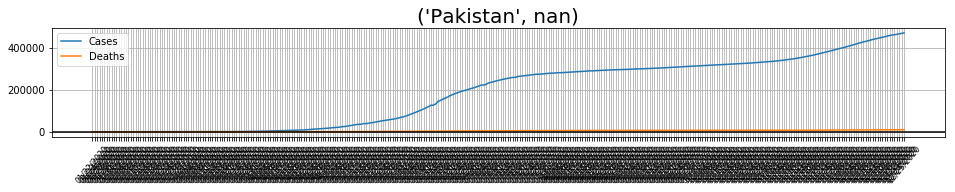

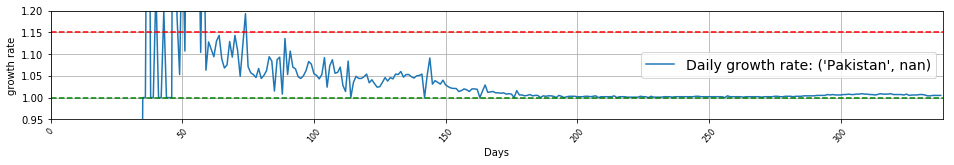

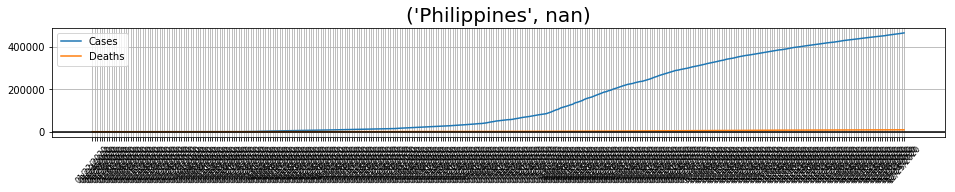

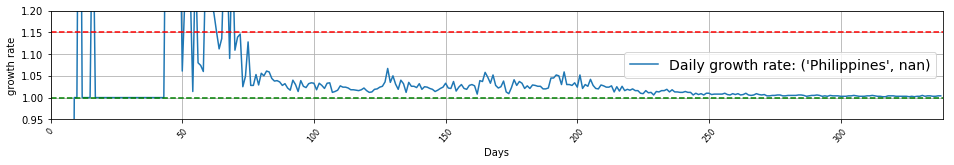

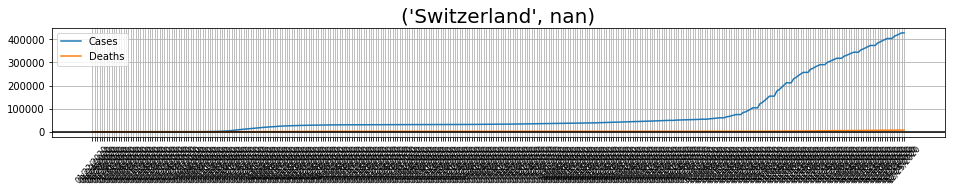

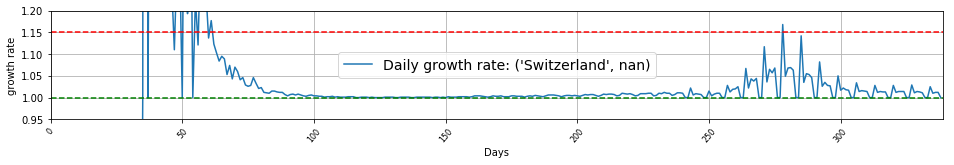

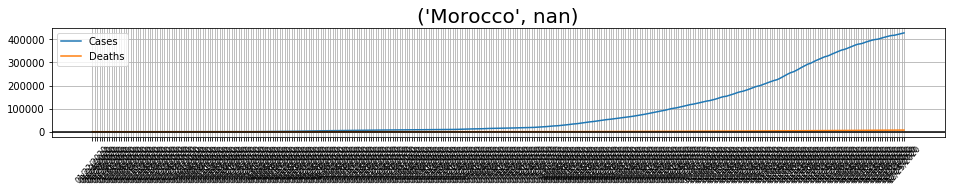

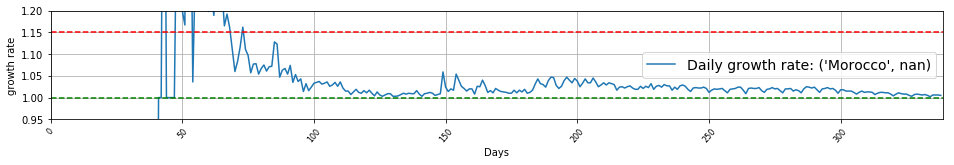

In [30]:
for c in top_x_indices:
    plot_country(c)
    give_me_list_get_plot_of_growth_rates(c, sbcdf_df)
    # add plot daily confirmed
    # ad plot daily deaths

## Start focusing on deaths as main metric & improve index

### code

In [44]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df.set_index(["Country/Region","Province/State"], inplace=True)
deaths_df.set_index(["Country/Region","Province/State"], inplace=True)
# recoveries_df.set_index(["Country/Region","Province/State"], inplace=True)
confirmed_df.drop(['Long','Lat'],axis=1,inplace=True)
deaths_df.drop(['Long','Lat'],axis=1,inplace=True)
# recoveries_df.drop(['Long','Lat'],axis=1,inplace=True)

In [45]:
def get_list_of_dates(start):
    dates = confirmed_df.keys()
    future_forcast = np.array([i for i in range(len(dates))]).reshape(-1, 1)
    start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
    future_forcast_dates = []
    for i in range(len(future_forcast)):
        future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
    adjusted_dates = future_forcast_dates
    return adjusted_dates
adjusted_dates = get_list_of_dates(start = '1/22/2020')

In [46]:
def create_new_index_country_county(df):
    new_index_list = []
    for i in range(len(df)):
        if pd.isnull(df.index[i][1]):
            new_index_list.append(df.index[i][0])
        else:
            new_index_list.append(df.index[i][0] + ": " + df.index[i][1])
    df["location"] = new_index_list
    return df.set_index("location") # returns df with new index

In [47]:
new_confirmed_df = create_new_index_country_county(confirmed_df)
new_deaths_df = create_new_index_country_county(deaths_df)
# new_recoveries_df = create_new_index_country_county(recoveries_df)

In [48]:
new_confirmed_df = new_confirmed_df.sort_values(new_confirmed_df.columns[-1],ascending=False)
new_deaths_df = new_deaths_df.sort_values(new_deaths_df.columns[-1],ascending=False)
# new_recoveries_df = new_recoveries_df.sort_values(new_recoveries_df.columns[-1],ascending=False)

In [49]:
def get_daily_deaths_plot(df):
    list_daily_deaths = []
    for i in range(len(df.columns)):
        death_total_per_day = deaths_df[deaths_df.columns[i]].sum()
        list_daily_deaths.append(death_total_per_day)
    list_daily_deaths = np.array(list_daily_deaths)
    daily_deaths_non_acc = []   
    for i in range(len(list_daily_deaths)):
        if i ==0:
            daily_deaths_non_acc.append(list_daily_deaths[i]/2)
            continue
        else:
            daily_deaths_non_acc.append(list_daily_deaths[i]-list_daily_deaths[i-1])    
    total_deaths = daily_deaths_non_acc
    df_total_deaths = pd.DataFrame(total_deaths).transpose()
    df_total_deaths.index.name = "total deaths"
    fig1 = df_total_deaths.transpose().plot.area(legend=False,figsize=(20,8),title="total daily deaths", grid=True,fontsize=15)
    fig1.figure.savefig(full_path+'total daily deaths')
#     return df_total_deaths.transpose().plot.area(legend=False,figsize=(20,8),title="total daily deaths", grid=True,fontsize=15)

### visualisation

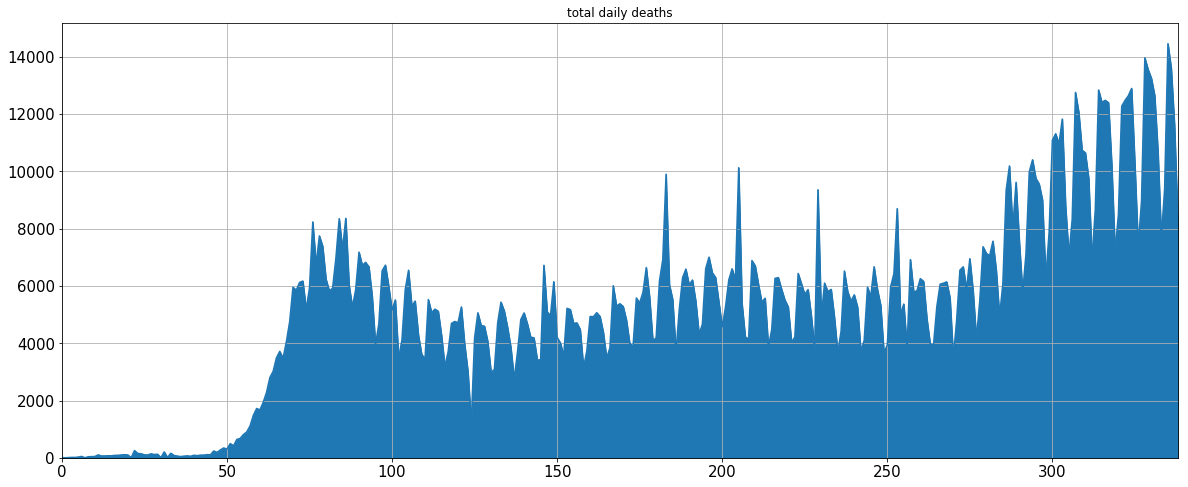

In [50]:
get_daily_deaths_plot(new_deaths_df)

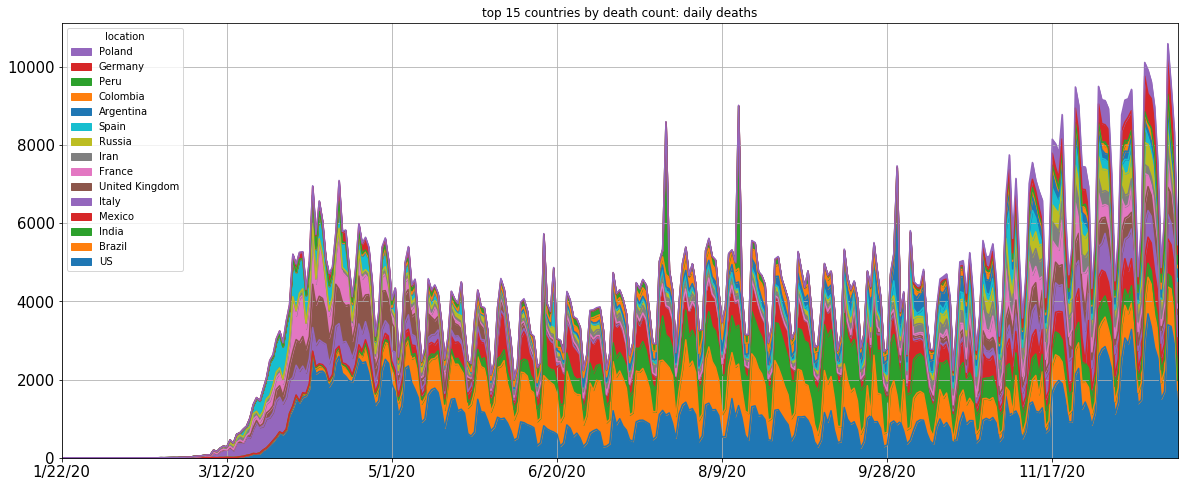

In [51]:
TOP_X = 15
top_10_deaths = new_deaths_df[:TOP_X]
top_10_deaths = top_10_deaths.transpose()
top_10_deaths = top_10_deaths.diff()
top_10_deaths = top_10_deaths.transpose()
top_10_deaths[top_10_deaths < 0] = 0
fig1 = top_10_deaths.transpose().plot.area(figsize=(20,8),title="top {} countries by death count: daily deaths".format(TOP_X), grid=True,fontsize=15,legend='reverse')
fig1.figure.savefig(full_path+'death count top {} daily deaths'.format(TOP_X))

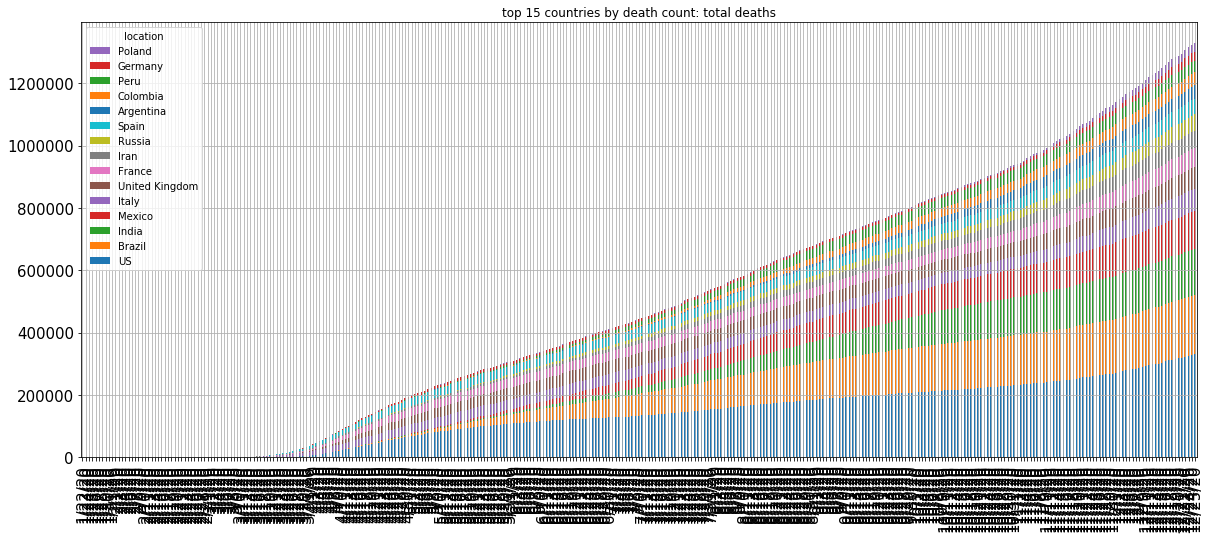

In [52]:
top_10_deaths = new_deaths_df[:TOP_X]
# fig1 = top_10_deaths.transpose().plot.area(figsize=(20,8),title="top {} countries by death count: total deaths".format(TOP_X), grid=True,fontsize=15,legend='reverse')
fig1 = top_10_deaths.transpose().plot(kind='bar', stacked=True,figsize=(20,8),title="top {} countries by death count: total deaths".format(TOP_X), grid=True,fontsize=15,legend='reverse')
fig1.figure.savefig(full_path+'death count top {} total deaths'.format(TOP_X))

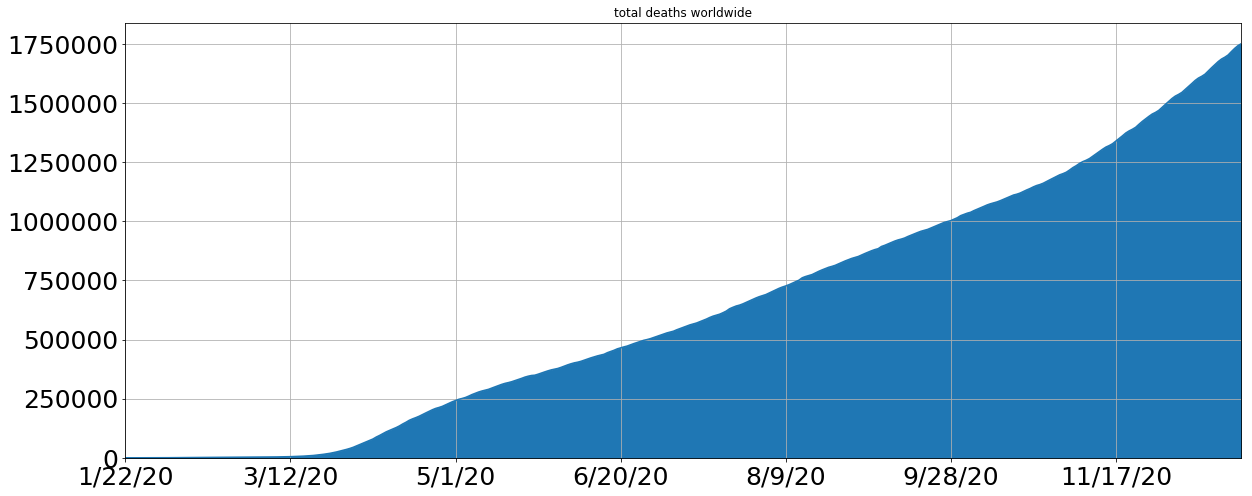

In [53]:
fig1 = new_deaths_df.sum().transpose().plot.area(figsize=(20,8), title="total deaths worldwide",grid=True,fontsize=25)
fig1.figure.savefig(full_path+'total deaths')

## Daily growth rate of deaths

## Confrimed cases: 

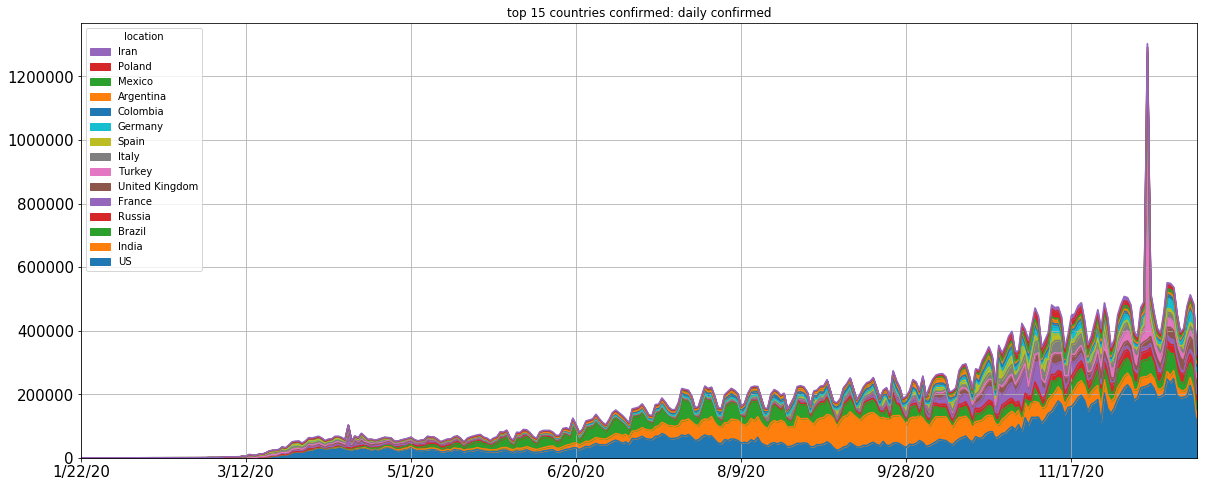

In [54]:
TOP_X = 15
top_10_confirmed = new_confirmed_df[:TOP_X]
top_10_confirmed = top_10_confirmed.transpose()
top_10_confirmed = top_10_confirmed.diff()
top_10_confirmed = top_10_confirmed.transpose()
top_10_confirmed[top_10_confirmed < 0] = 0

fig1 = top_10_confirmed.transpose().plot.area(figsize=(20,8),title="top {} countries confirmed: daily confirmed".format(TOP_X), grid=True,fontsize=15,legend='reverse')
fig1.figure.savefig(full_path+'count top {} daily confirmed'.format(TOP_X))

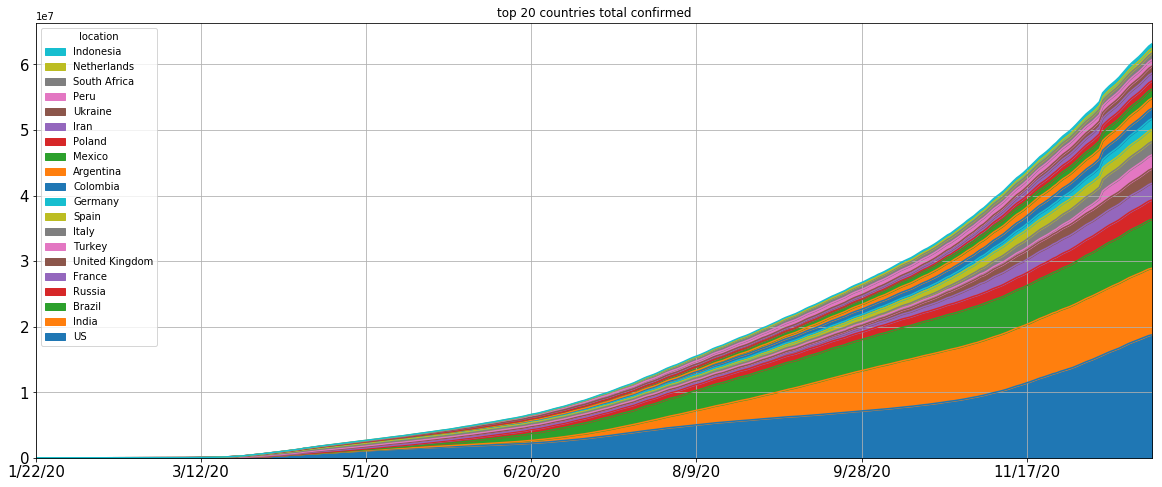

In [55]:
TOP_X = 20
top_10_confirmed = new_confirmed_df[:TOP_X]
fig1 = top_10_confirmed.transpose().plot.area(figsize=(20,8),title="top {} countries total confirmed".format(TOP_X), grid=True,fontsize=15,legend='reverse')
fig1.figure.savefig(full_path+'count top {} total confirmed'.format(TOP_X))

## Mortality rate global

In [56]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df.set_index(["Country/Region","Province/State"], inplace=True)
deaths_df.set_index(["Country/Region","Province/State"], inplace=True)
# recoveries_df.set_index(["Country/Region","Province/State"], inplace=True)
confirmed_df.drop(['Long','Lat'],axis=1,inplace=True)
deaths_df.drop(['Long','Lat'],axis=1,inplace=True)
# recoveries_df.drop(['Long','Lat'],axis=1,inplace=True)

In [57]:
def get_list_of_dates(start):
    dates = confirmed_df.keys()
    future_forcast = np.array([i for i in range(len(dates))]).reshape(-1, 1)
    start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
    future_forcast_dates = []
    for i in range(len(future_forcast)):
        future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
    adjusted_dates = future_forcast_dates
    return adjusted_dates
adjusted_dates = get_list_of_dates(start = '1/22/2020')

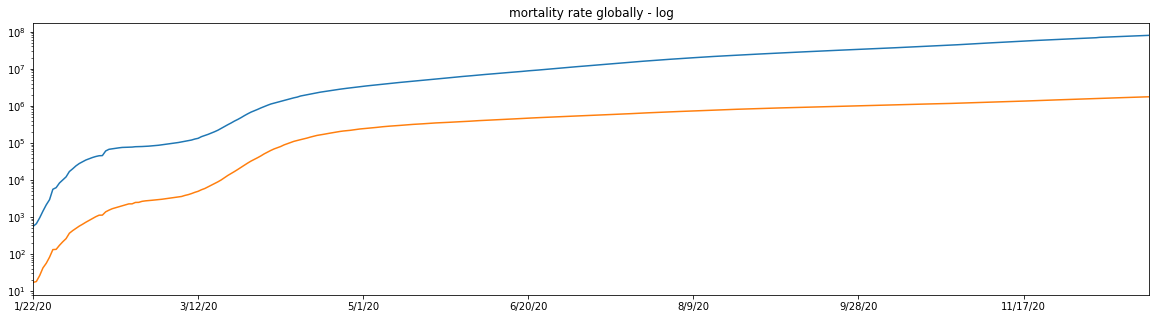

In [58]:
confirmed_df.sum().plot(figsize=(20,5),title="mortality rate globally - log",logy=True)
fig1 = deaths_df.sum().plot(logy=True)
fig1.figure.savefig(full_path+'mortality rate globally - log')

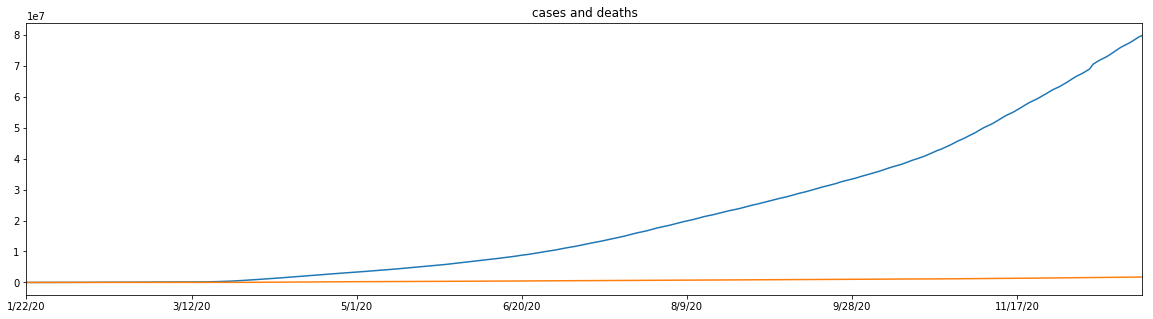

In [59]:
confirmed_df.sum().plot(figsize=(20,5),title="cases and deaths",logy=False)
fig1 = deaths_df.sum().plot(logy=False)
fig1.figure.savefig(full_path+'mortality rate globally ')

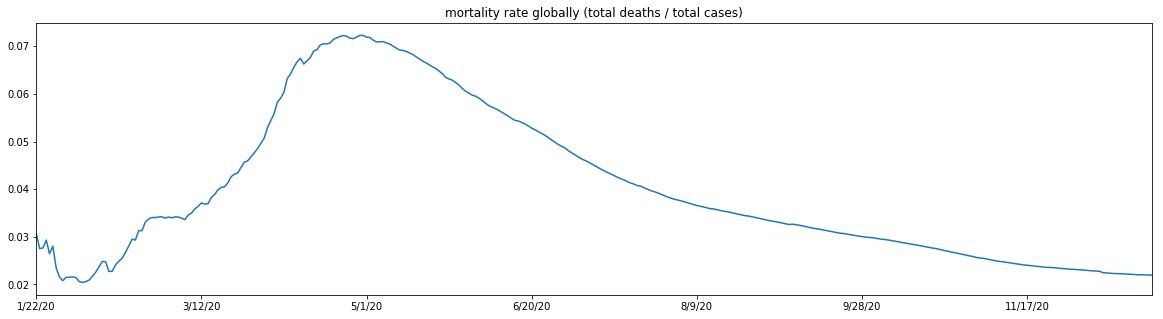

In [60]:
mortality_df = deaths_df.sum()/confirmed_df.sum()
fig1 = mortality_df.plot(figsize=(20,5),title="mortality rate globally (total deaths / total cases)")
fig1.figure.savefig(full_path+"daily_mortality_rate_globally")